INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
{'a0': 1.0, 'af': 2.0, 'a': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ]), 'steps': 10, 'N_mesh': 64, 'L0': 100, 'batch_size': 2, 'steps_taken': 9, 'cosmo': {'w0': -1.25, 'wa': 0.0, 'H0': 100, 'h': 0.6774, 'Omega0_b': 0.06, 'Omega0_c': 0.24, 'Omega0_m': 0.3, 'Omega0_k': 0.0, 'Omega0_de': 0.67, 'n_s': 0.9667, 'sigma8': 0.8159}, 'sfn': array([0.5       , 0.55555556, 0.61111111, 0.66666667, 0.72222222,
       0.77777778, 0.83333333, 0.88888889, 0.94444444, 1.        ])}


<IPython.core.display.Javascript object>


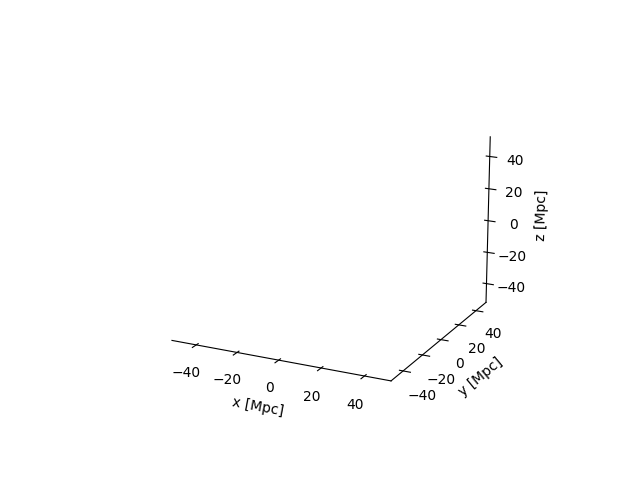

In [1]:
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)
uni = framework.ModelUniverse(w=-1.25, vis_matter=0.06, dark_matter=0.24, dark_energy=0.67, radiation=8.4e-5, lam=0.0, use_default=False, de_type='CC')
uni.sf = np.linspace(1, 2, 10)
# uni.simulate(uni.sf, 10, N_mesh=64)
uni.info = uni.read_time_step('', filename_suffix='uniobj').info
print(uni.info)
import darksim.utils as utils
%matplotlib notebook
utils.animate3d(uni, save=False)
plt.show()

In [2]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

from darksim.utils import const

def a(Ht, zeta0, zeta1): # times in Gyr
    # Ignore errors, this just means the universe hasn't been born
    with np.errstate(invalid='ignore'):
        return np.power((zeta0 + zeta1 - 3 + (3 - zeta1) * np.exp(0.5 * zeta0 * Ht)) * (1 / zeta0), 2 / (3 - zeta1))

Htimes = np.linspace(-.8, 2, 20)
sf = a(Htimes, 4.38929, -2.16673)
sf *= (1/sf[0])
sf

array([ 1.        ,  1.70306131,  2.24117834,  2.75346909,  3.27873856,
        3.83757513,  4.44493116,  5.11386703,  5.85708317,  6.68771113,
        7.61981494,  8.6687717 ,  9.85160532, 11.18731016, 12.69718528,
       14.40519281, 16.3383508 , 18.5271692 , 21.00613759, 23.8142731 ])

In [1]:
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as mpl_anim
from matplotlib import rc
import time
plt.rcParams["figure.figsize"] = (16,9)
st = time.time()
uni = framework.ModelUniverse(w=-1.1, vis_matter=0.06, de_type='CC',dark_matter=0.24, dark_energy=0.67, radiation=8.4e-5, lam=0.0, use_default=False)
# sim = uni.simulate(np.linspace(0.01, 1, 20), 20, N_mesh=32)
uni.info = {
    'L0': 100,
    'steps': 20,
    'N_mesh': 32
}
uni.sf = sf
%matplotlib notebook

def animate3d(uni, fps=10, update_axis=True, title='', save=True, filename=r"/home/rettwolf/projects/PHYS3266/animations/{}.gif", dpi=1200, **kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter, = ax.plot([], [], [], "o", markersize=.5, linewidth=2, color='black', label='points', clip_on=False)

    # Plot parameters
    # Axis limits
    _res = uni.read_time_step(0)
    _min, _max = np.min(_res[0,0,:,0]), np.max(_res[0,0,:,0])

    # Coefficient to multiply by and offset
    coeff = uni.info['L0'] / (_max - _min)
    offset = (_max - _min) / 2
    
    lim = uni.info['L0'] / 2
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_zlim(-lim,lim)
    
    # Fonts
    rc('font',size=16)
    rc('font',family='serif')
    rc('axes',labelsize=16)

    # Titles
    ax.set_title(f'Model Universe, $\Omega_{{M,0}}=${uni._matter}, $\Omega_{{r,0}}=${uni._r}, $\Omega_{{DE,0}}=${uni._de} ({uni.de_type})')
    ax.set_xlabel('x [Mpc]', labelpad=10)
    ax.set_ylabel('y [Mpc]', labelpad=10)
    ax.set_zlabel('z [Mpc]', labelpad=10)
    
    sft = fig.text(40, 40, "a=1", )

    # Remove background
    ax.grid(False)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Ticks
    ax.xaxis._axinfo['tick']['inward_factor'] = .4
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.2
    ax.yaxis._axinfo['tick']['inward_factor'] = .4
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.2
    ax.zaxis._axinfo['tick']['inward_factor'] = .4
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.2
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.2
    uni.sf += 1
    def _update3d(i):
        result = uni.read_time_step(i)
        sft.set_text(f'a={round(uni.sf[i], 3)}')
        scatter.set_data((result[0,0,:,0] - offset)*uni.sf[i], (result[0,0,:,1] - offset)*uni.sf[i])
        scatter.set_3d_properties((result[0,0,:,2] - offset)*uni.sf[i])


    anim = mpl_anim.FuncAnimation(fig, _update3d, uni.info['steps'], interval=1000/fps,
                                 blit=False, cache_frame_data=False, **kwargs)

    if save:
        writer = mpl_anim.PillowWriter(fps=10) # gif
#         writer = mpl_anim.FFMpegWriter(fps=10) # mp4
        anim.save(filename.format('ANIMATIONTEST' + str(uni)), writer=writer, dpi=600)
    return anim

anim_obj = animate3d(uni, fps=10, title=str(uni), save=True)
plt.show()
print(f"Total Runtime: {time.time() - st}")


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


NameError: name 'sf' is not defined

In [2]:
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as mpl_anim
from matplotlib import rc
import time
plt.rcParams["figure.figsize"] = (32,18)
st = time.time()
uni = framework.ModelUniverse(w=-1.1, vis_matter=0.06,de_type='CC', dark_matter=0.24, dark_energy=0.67, radiation=8.4e-5, lam=0.0, use_default=False)
sim = uni.simulate(np.linspace(0.01, 1, 20), 20, N_mesh=32)
# uni.info = {
#     'L0': 100,
#     'steps': 149,
#     'N_mesh': 256
# }
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

from darksim.utils import const

def a(Ht, zeta0, zeta1): # times in Gyr
    # Ignore errors, this just means the universe hasn't been born
    with np.errstate(invalid='ignore'):
        return np.power((zeta0 + zeta1 - 3 + (3 - zeta1) * np.exp(0.5 * zeta0 * Ht)) * (1 / zeta0), 2 / (3 - zeta1))

import numpy as np
import scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt

a0 = 0.01

def da_dt(a, t):
    return np.sqrt(8.5e-5*a**-2+ 0.27*a**-1 + 0 + 0.72*a**2)
Htimes = np.linspace(-.8, 2, 150)

# sf = odeint(da_dt, a0, Htimes).flatten()
sf = a(Htimes, 4.00, -1.00)
sf *= (1/sf[0]) # Normalize
print(sf)
uni.sf = sf
# uni.DIR = f'/mnt/wolf/darksim_data/{str(uni)}/'
def animate3d(uni, fps=10, update_axis=True, title='', save=True, filename=r"/home/dev/animations/{}.mp4", dpi=400, **kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter, = ax.plot([], [], [], "o", markersize=.075, linewidth=2, color='black', label='points', clip_on=False)

    # Plot parameters
    # Axis limits
    _res = uni.read_time_step(0)
    _min, _max = np.min(_res[0,0,:,0]), np.max(_res[0,0,:,0])

    # Coefficient to multiply by and offset
    coeff = uni.info['L0'] / (_max - _min)
    offset = (_max - _min) / 2

    lim = uni.info['L0'] / 2
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_zlim(-lim,lim)

    # Fonts
    rc('font',size=16)
    rc('font',family='serif')
    rc('axes',labelsize=16)

    # Titles
    # ax.set_title(f'Model Universe, $\Omega_{{M,0}}=$0.27, $\Omega_{{r,0}}=$8.5e-5, $\Omega_{{DE,0}}=$0.72 (Cosmological Constant)')
    ax.set_title(f'Model Universe, $\Omega_{{M,0}}=$1.00, $\Omega_{{r,0}}=$8.5e-5, $\Omega_{{DE,0}}=$0 (Bulk Viscosity)')
    ax.set_xlabel('x [Mpc]', labelpad=10)
    ax.set_ylabel('y [Mpc]', labelpad=10)
    ax.set_zlabel('z [Mpc]', labelpad=10)

    # sft = fig.text(0, 0, "a=1", verticalalignment='center', horizontalalignment='center', transform=ax.transAxes)
    sf_subtitle = fig.suptitle(f'a = {round(1, 2)}, $H_0(t-t_0)=${round(-.8, 2)}', y=0.87)

    # Remove background
    ax.grid(False)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Ticks
    ax.xaxis._axinfo['tick']['inward_factor'] = .4
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.2
    ax.yaxis._axinfo['tick']['inward_factor'] = .4
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.2
    ax.zaxis._axinfo['tick']['inward_factor'] = .4
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.2
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.2

    def _update3d(i):
        result = uni.read_time_step(i)
        sf_subtitle.set_text(f'a={round(uni.sf[i], 2)}, $H_0(t-t_0)=${round(Htimes[i], 2)}')
        scatter.set_data((result[0,0,:,0] - offset)*uni.sf[i], (result[0,0,:,1] - offset)*uni.sf[i])
        scatter.set_3d_properties((result[0,0,:,2] - offset)*uni.sf[i])


    anim = mpl_anim.FuncAnimation(fig, _update3d, uni.info['steps'], interval=1000/fps,
                                 blit=False, cache_frame_data=False, **kwargs)

    if save:
        # writer = mpl_anim.PillowWriter(fps=10) # gif
        writer = mpl_anim.FFMpegWriter(fps=10) # mp4
        print('SAVE_DIR: ', filename.format('final_CC_256_realvalues_' + str(uni)))
        anim.save(filename.format('final_CC_256_realvalues_' + str(uni)), writer=writer, dpi=dpi)
    return anim

anim_obj = animate3d(uni, fps=10, title=str(uni), save=False)
%matplotlib notebook
print(f"Total Runtime: {time.time() - st}")
plt.show()

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=CC_Ode0=0.67_DEEOS=-1.1][32, 2, 0.01-1.0] Time Evolution: 1/19		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=CC_Ode0=0.67_DEEOS=-1.1][32, 2, 0.01-1.0] Time Evolution: 2/19		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=CC_Ode0=0.67_DEEOS=-1.1][32, 2, 0.01-1.0] Time Evolution: 3/19		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=CC_Ode0=0.67_DEEOS=-1.1][32, 2, 0.01-1.0] Time Evolution: 4/19		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=CC_Ode0=0.67_DEEOS=-1.1][32, 2, 0.01-1.0] Time Evolution: 5/19		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=CC_Ode0=0.67_DEEOS=-1.1][32, 2, 0.01-1.0] Time Evolution: 6/19		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=CC_Ode0=0.67_DEEOS=-1.1][32, 2, 0.01-1.0] Time Evolution: 7/19		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET

In [9]:
import numpy as np
import scipy
from scipy.integrate import odeint

Htimes = np.linspace(-1, 10, 50000)
a0 = 0.01

def da_dt(a, t):
    return np.sqrt(0*a**-2+ 2*a**-1 + (1-2) + 0*a**2)

result = odeint(da_dt, a0, Htimes)
index = np.where(np.isnan(result.flatten()))[0][0] # Where it errors

times2 = np.linspace(2.3547, 5.57, 50000-index)
a02 = result[index-1]
def da_dt2(a, t):
    return -np.sqrt(abs(0*a**-2+ 2*a**-1 + (1-2-0) + 0*a**2))

result2 = odeint(da_dt2, a02, times2)


sf = np.concatenate((result[:index], result2))

# Replace negative values
sf[np.where(sf < 0)] = 0
sf = sf.flatten()
# sf += 1-sf[0]
# sf[-6:] = np.linspace(.1, 0, 6)
sf[49900:]

<ipython-input-9-37fa8219294e>:9: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(0*a**-2+ 2*a**-1 + (1-2) + 0*a**2)


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.08, 0.06, 0.04, 0.02,
       0.  ])

In [1]:
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as mpl_anim
from matplotlib import rc
import time
plt.rcParams["figure.figsize"] = (10,10)
st = time.time()
%matplotlib notebook

import numpy as np

Htimes = np.linspace(-1, 10, 50000)



def a(Ht, zeta0, zeta1): # times in Gyr
    # Ignore errors, this just means the universe hasn't been born
    with np.errstate(invalid='ignore'):
        return np.power((zeta0 + zeta1 - 3 + (3 - zeta1) * np.exp(0.5 * zeta0 * Ht)) * (1 / zeta0), 2 / (3 - zeta1))

steps = 500                 
zeta0 = np.linspace(-5, 5, steps)

zeta1 = 0               
def animateScaleTime(fps=30, update_axis=True, title='', save=True, filename=r"/home/rettwolf/projects/PHYS3266/animations/{}.gif", dpi=400, **kwargs):
    fig, ax = plt.subplots()

    line, = ax.plot([], [], color='black')
    
    # Fonts
    rc('font',size=16)
    rc('font',family='serif')
    rc('axes',labelsize=16)

    # Titles
    # ax.set_title(f'Model Universe, $\Omega_{{M,0}}=$0.27, $\Omega_{{r,0}}=$8.5e-5, $\Omega_{{DE,0}}=$0.72 (Cosmological Constant)')
    ax.set_title(f'Scale factor vs time for our Universe (Bulk Viscosity)')
    ax.set_xlabel('Time [$H_0(t - t_0)$]', labelpad=10)
    ax.set_ylabel('$a(t)$', labelpad=10)
    ax.set_xlim(-1, 2)
    ax.set_ylim(0, 2.5)
#     sf_subtitle = fig.suptitle(f'$\zeta_0=${zeta0[0]}', y=0.87)

    def init():
        line.set_data([], [])
        return line,

    def _update(i):
        line.set_data(Htimes, a(Htimes, zeta0[i], zeta1))
        sf_subtitle.set_text(f'$\zeta_0=${round(zeta0[i], 2)}')
        return line,
#     ax.plot(Htimes, a(Htimes, 4, -1), color='cyan', linestyle='dashed', label='$\zeta_0=4, \zeta_1=-1$ (de Sitter)')
    ax.plot(Htimes, a(Htimes, 4.389, -2.167), color='blue', linestyle='solid', label='Our Universe')
#     ax.plot(Htimes, a(Htimes, , color='gold', linestyle='solid', label='Overdense Matter')

    ax.axvline(x=0, linewidth=0.5)
    ax.axhline(y=1, linewidth=0.5)

    ax.legend(loc='best')
    plt.show()
#     plt.save('no_bang_')
#     anim = mpl_anim.FuncAnimation(fig, _update, steps-1, init_func=init, interval=1, blit=True, **kwargs)
#     anim.save('testing_sf_plot.mp4')
#     if save:
#         writer = mpl_anim.PillowWriter(fps=30) # gif
# #         writer = mpl_anim.FFMpegWriter(fps=15) # mp4
#         print('SAVE_DIR: ', filename.format('test_anim_sf_zeta0'))
#         anim.save(filename.format('final_anim_sf_zeta0'), writer=writer, dpi=60)
#     return anim

anim_obj = animateScaleTime(save=False)

print(f"Total Runtime: {time.time() - st}")
# plt.show()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


<IPython.core.display.Javascript object>

Total Runtime: 0.020140886306762695


<IPython.core.display.Javascript object>


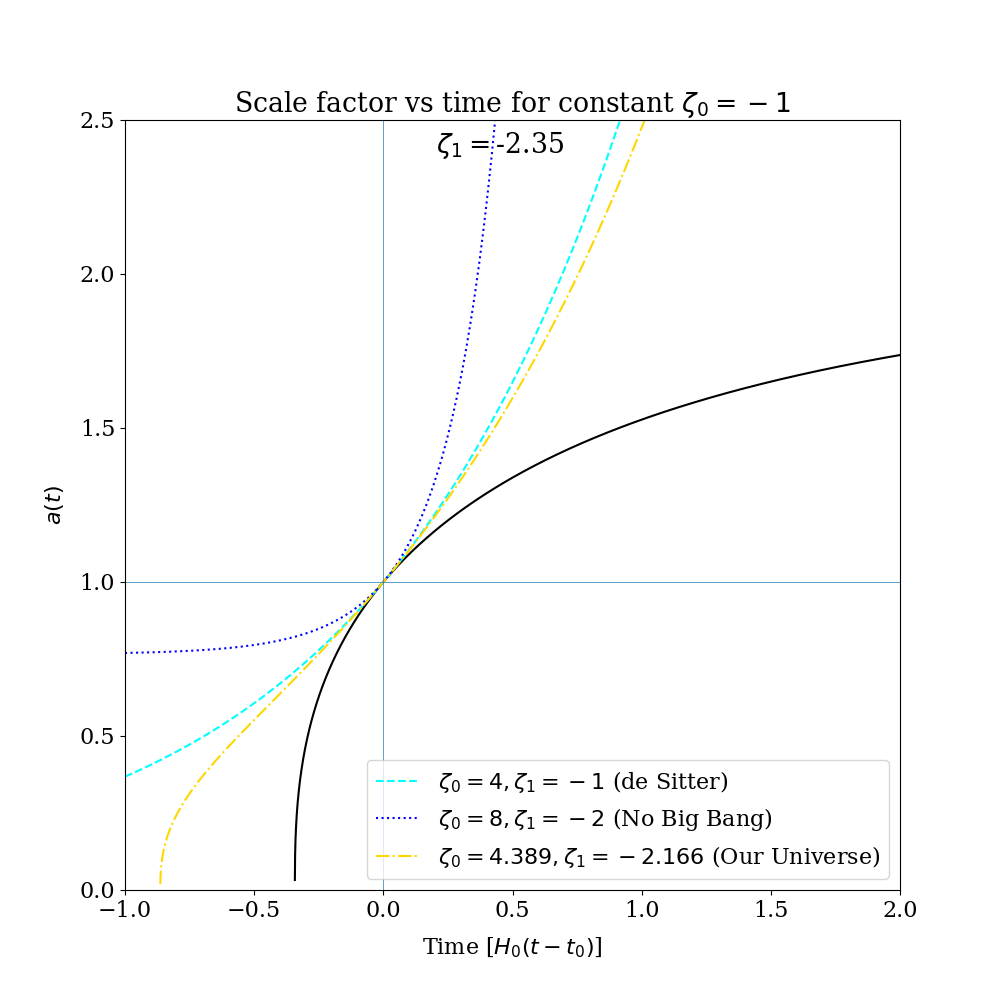

Total Runtime: 0.02065110206604004


In [4]:
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as mpl_anim
from matplotlib import rc
import time
plt.rcParams["figure.figsize"] = (10,10)
st = time.time()
%matplotlib notebook

import numpy as np

Htimes = np.linspace(-1, 10, 50000)

def a(Ht, zeta0, zeta1): # times in Gyr
    # Ignore errors, this just means the universe hasn't been born
    with np.errstate(invalid='ignore'):
        return np.power((zeta0 + zeta1 - 3 + (3 - zeta1) * np.exp(0.5 * zeta0 * Ht)) * (1 / zeta0), 2 / (3 - zeta1))

steps = 500                 
zeta0 = -1

zeta1 = np.linspace(-5, 5, steps)             
def animateScaleTime(fps=30, update_axis=True, title='', save=True, filename=r"/home/rettwolf/projects/PHYS3266/animations/{}.gif", dpi=400, **kwargs):
    fig, ax = plt.subplots()

    line, = ax.plot([], [], color='black')
    
    # Fonts
    rc('font',size=16)
    rc('font',family='serif')
    rc('axes',labelsize=16)

    # Titles
    # ax.set_title(f'Model Universe, $\Omega_{{M,0}}=$0.27, $\Omega_{{r,0}}=$8.5e-5, $\Omega_{{DE,0}}=$0.72 (Cosmological Constant)')
    ax.set_title(f'Scale factor vs time for constant $\zeta_0 = -1$')
    ax.set_xlabel('Time [$H_0(t - t_0)$]', labelpad=10)
    ax.set_ylabel('$a(t)$', labelpad=10)
    ax.set_xlim(-1, 2)
    ax.set_ylim(0, 2.5)
    sf_subtitle = fig.suptitle(f'$\zeta_1=${zeta1[0]}', y=0.87)

    def init():
        line.set_data([], [])
        return line,

    def _update(i):
        line.set_data(Htimes, a(Htimes, zeta0, zeta1[i]))
        sf_subtitle.set_text(f'$\zeta_1=${round(zeta1[i], 2)}')
        return line,
    ax.plot(Htimes, a(Htimes, 4, -1), color='cyan', linestyle='dashed', label='$\zeta_0=4, \zeta_1=-1$ (de Sitter)')
    ax.plot(Htimes, a(Htimes, 8, 2), color='blue', linestyle='dotted', label='$\zeta_0=8, \zeta_1=-2$ (No Big Bang)')
    ax.plot(Htimes, a(Htimes, 4.389, -2.166), color='gold', linestyle='dashdot', label='$\zeta_0=4.389, \zeta_1=-2.166$ (Our Universe)')

    ax.axvline(x=0, linewidth=0.5)
    ax.axhline(y=1, linewidth=0.5)

    ax.legend(loc='best')
    plt.show()
    anim = mpl_anim.FuncAnimation(fig, _update, steps-1, init_func=init, interval=1, blit=True, **kwargs)
#     anim.save('testing_sf_plot.mp4')
#     if save:
#         writer = mpl_anim.PillowWriter(fps=30) # gif
# #         writer = mpl_anim.FFMpegWriter(fps=15) # mp4
#         print('SAVE_DIR: ', filename.format('test_anim_sf_zeta1'))
#         anim.save(filename.format('test_anim_sf_zeta1'), writer=writer, dpi=60)
    return anim

anim_obj = animateScaleTime(save=False)

print(f"Total Runtime: {time.time() - st}")
plt.show()

In [9]:
odeint(da_dt_cc, a0, Htimes)

array([[1.00000000e-03],
       [1.95233022e-03],
       [2.68700026e-03],
       ...,
       [5.82978602e+00],
       [5.83007685e+00],
       [5.83036770e+00]])

In [4]:
plt.plot(Htimes, odeint(da_dt_cc, a0, Htimes))
plt.show()

<IPython.core.display.Javascript object>

In [1]:
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as mpl_anim
from matplotlib import rc
import time
plt.rcParams["figure.figsize"] = (10,10)
st = time.time()
%matplotlib notebook
from scipy.integrate import odeint
import numpy as np

Htimes = np.linspace(-1, 2, 50000)
Htimes1 = np.linspace(-1, 1, 500)
Htimes2 = np.linspace(-1, 1, 500)
steps = 500
def a(Ht, zeta0, zeta1): # times in Gyr
    # Ignore errors, this just means the universe hasn't been born
    with np.errstate(invalid='ignore'):
        return np.power((zeta0 + zeta1 - 3 + (3 - zeta1) * np.exp(0.5 * zeta0 * Ht)) * (1 / zeta0), 2 / (3 - zeta1))

w_arr = np.linspace(-.35, -1.5, steps)
a0=0.01
def da_dt_cc(a, t):
    w=-1
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))
def da_dt_pe(a, t):
    w=-1.5
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))
def da_dt_q(a, t):
    w=-0.5
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))

def da_dt(a, t, w):
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))

def da_dt_sitter(a, t):
    wpower = 0
    return a

def animateScaleTime(fps=30, update_axis=True, title='', save=True, filename=r"/home/rettwolf/projects/PHYS3266/animations/{}.gif", dpi=400, **kwargs):
    fig, ax = plt.subplots()

    line, = ax.plot([], [], color='black')
    
    # Fonts
    rc('font',size=16)
    rc('font',family='serif')
    rc('axes',labelsize=16)

    # Titles
    # ax.set_title(f'Model Universe, $\Omega_{{M,0}}=$0.27, $\Omega_{{r,0}}=$8.5e-5, $\Omega_{{DE,0}}=$0.72 (Cosmological Constant)')
    ax.set_title(f'Scale factor vs time for best fit DE universe ($\Omega_m=0.3103, \Omega_{{DE}}=0.6897$)', pad=15)
    ax.set_xlabel('Time [$H_0(t - t_0)$]', labelpad=10)
    ax.set_ylabel('$a(t)$', labelpad=10)
    ax.set_xlim(-1, 2)
    ax.set_ylim(0, 2.5)
#     sf_subtitle = fig.suptitle(f'$\omega_{{DE}}=$-0.5', y=0.87)

    def init():
        line.set_data([], [])
        return line,

    def _update(i):
        line.set_data(Htimes[:-int(Htimes2.shape[0]/6)], odeint(da_dt, a0, Htimes, args=(w_arr[i],)).flatten()[:-int(Htimes2.shape[0]/6)])
        sf_subtitle.set_text(f'$\omega_{{DE}}=${round(w_arr[i], 2)}')
        return line,
    ax.plot(Htimes[:-int(Htimes2.shape[0]/5)], odeint(da_dt_q, a0, Htimes).flatten()[:-int(Htimes2.shape[0]/5)], color='blue', linestyle='solid', label='$\omega_{{DE}}=-0.5$ (Quintessence)')
#     ax.plot(Htimes2[:-int(Htimes2.shape[0]/5)], odeint(da_dt_pe, a0, Htimes).flatten()[:-int(Htimes2.shape[0]/5)], color='red', linestyle='dotted', label='$\omega_{{DE}}=-1.5$ (Phantom Energy)')
    ax.plot(Htimes, a(Htimes, 4, -1), color='cyan', linestyle='dashed', label='$\omega_{{DE}}=-1$ (de Sitter)')
    
    ax.axvline(x=0, linewidth=0.5)
    ax.axhline(y=1, linewidth=0.5)

    ax.legend(loc='best')
    plt.show()
#     anim = mpl_anim.FuncAnimation(fig, _update, steps-1, init_func=init, interval=1, blit=True, **kwargs)
#     return None
#     if save:
#         writer = mpl_anim.PillowWriter(fps=30) # gif
# #         writer = mpl_anim.FFMpegWriter(fps=15) # mp4
# #         print('SAVE_DIR: ', filename.format('final_anim_sf_zeta1'))
#         anim.save(filename.format('final_anim_sf_DE_1'), writer=writer, dpi=60)
#     return anim

anim_obj = animateScaleTime(save=True)

print(f"Total Runtime: {time.time() - st}")
plt.show()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


<IPython.core.display.Javascript object>

Total Runtime: 0.0506596565246582


In [2]:
odeint(da_dt_sitter, a0, Htimes).flatten()

array([0.01      , 0.0100006 , 0.0100012 , ..., 0.20083167, 0.20084372,
       0.20085577])

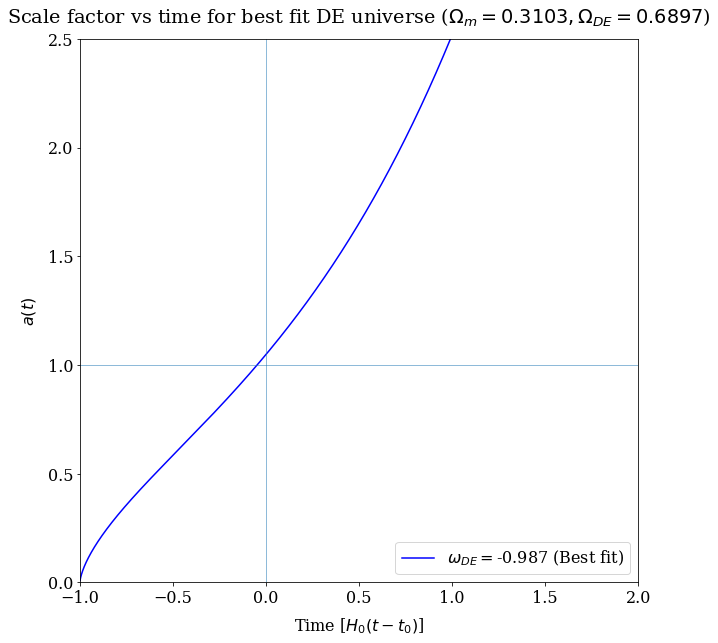

Total Runtime: 0.18662238121032715


In [6]:
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.animation as mpl_anim
from matplotlib import rc
import time
plt.rcParams["figure.figsize"] = (10,10)
st = time.time()
# %matplotlib notebook
from scipy.integrate import odeint
import numpy as np

Htimes = np.linspace(-1, 2, 50000)
Htimes1 = np.linspace(-1, 1, 500)
Htimes2 = np.linspace(-1, 1, 500)
steps = 500
def a(Ht, zeta0, zeta1): # times in Gyr
    # Ignore errors, this just means the universe hasn't been born
    with np.errstate(invalid='ignore'):
        return np.power((zeta0 + zeta1 - 3 + (3 - zeta1) * np.exp(0.5 * zeta0 * Ht)) * (1 / zeta0), 2 / (3 - zeta1))

w_arr = np.linspace(-.35, -1.5, steps)
a0=0.01
def da_dt_cc(a, t):
    w=-.987
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))
def da_dt_pe(a, t):
    w=-1.5
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))
def da_dt_q(a, t):
    w=-0.5
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))

def da_dt(a, t, w):
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))

def da_dt_sitter(a, t):
    wpower = 0
    return a

fig, ax = plt.subplots()

line, = ax.plot([], [], color='black')

# Fonts
rc('font',size=16)
rc('font',family='serif')
rc('axes',labelsize=16)

# Titles
# ax.set_title(f'Model Universe, $\Omega_{{M,0}}=$0.27, $\Omega_{{r,0}}=$8.5e-5, $\Omega_{{DE,0}}=$0.72 (Cosmological Constant)')
ax.set_title(f'Scale factor vs time for best fit DE universe ($\Omega_m=0.3103, \Omega_{{DE}}=0.6897$)', pad=15)
ax.set_xlabel('Time [$H_0(t - t_0)$]', labelpad=10)
ax.set_ylabel('$a(t)$', labelpad=10)
ax.set_xlim(-1, 2)
ax.set_ylim(0, 2.5)


ax.plot(Htimes, odeint(da_dt_cc, a0, Htimes).flatten(), color='blue', linestyle='solid', label='$\omega_{{DE}}=$-0.987 (Best fit)')
#     ax.plot(Htimes2[:-int(Htimes2.shape[0]/5)], odeint(da_dt_pe, a0, Htimes).flatten()[:-int(Htimes2.shape[0]/5)], color='red', linestyle='dotted', label='$\omega_{{DE}}=-1.5$ (Phantom Energy)')
# ax.plot(Htimes, a(Htimes, 4, -1), color='cyan', linestyle='dashed', label='$\omega_{{DE}}=-1$ (de Sitter)')

ax.axvline(x=0, linewidth=0.5)
ax.axhline(y=1, linewidth=0.5)

ax.legend(loc='best')
plt.show()


print(f"Total Runtime: {time.time() - st}")


In [2]:



from scipy.integrate import odeint
import numpy as np

Htimes = np.linspace(-1, 2, 150)
a0=1
def da_dt_cc(a, t):
    w=-1
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))
def da_dt_pe(a, t):
    w=-1.5
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))
def da_dt_q(a, t):
    w=-0.5
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))

def da_dt(a, t, w):
    wpower = -3*(1+w)
    return np.sqrt(8.49e-5*a**-2+ .3103*a**-1 + .6897*a**(wpower+2))

def da_dt_sitter(a, t):
    wpower = 0
    return a
sf = odeint(da_dt_cc, a0, Htimes).flatten()
sf

array([ 1.        ,  1.02024481,  1.04071438,  1.06141682,  1.08236017,
        1.10355243,  1.12500156,  1.14671552,  1.16870224,  1.19096966,
        1.2135257 ,  1.23637831,  1.25953544,  1.28300508,  1.30679521,
        1.33091388,  1.35536914,  1.3801691 ,  1.40532192,  1.43083582,
        1.45671904,  1.48297991,  1.50962681,  1.5366682 ,  1.56411259,
        1.59196859,  1.62024487,  1.64895021,  1.67809346,  1.70768356,
        1.73772956,  1.76824059,  1.7992259 ,  1.83069483,  1.86265686,
        1.89512156,  1.92809861,  1.96159784,  1.99562919,  2.03020272,
        2.06532863,  2.10101726,  2.13727909,  2.17412473,  2.21156495,
        2.24961066,  2.28827293,  2.327563  ,  2.36749224,  2.40807222,
        2.44931464,  2.49123141,  2.5338346 ,  2.57713645,  2.6211494 ,
        2.66588608,  2.71135929,  2.75758204,  2.80456754,  2.85232921,
        2.90088066,  2.95023574,  3.00040847,  3.05141314,  3.10326422,
        3.15597646,  3.2095648 ,  3.26404443,  3.3194308 ,  3.37

In [6]:
sf.shape

(150,)